In [1]:
#import library yang dibutuhkan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat missing value

In [6]:
df.duplicated().sum()

0

Tidak terdapat kolom yang duplikat

In [7]:
df.shape

(45211, 17)

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
int64_columns = df.dtypes[df.dtypes == 'int64'].index
print(int64_columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


Melihat kolom kolom yang numerikal

In [10]:
cat_columns = df.dtypes[df.dtypes == 'object'].index
print(cat_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


Melihat kolo kolom yang katagorikal

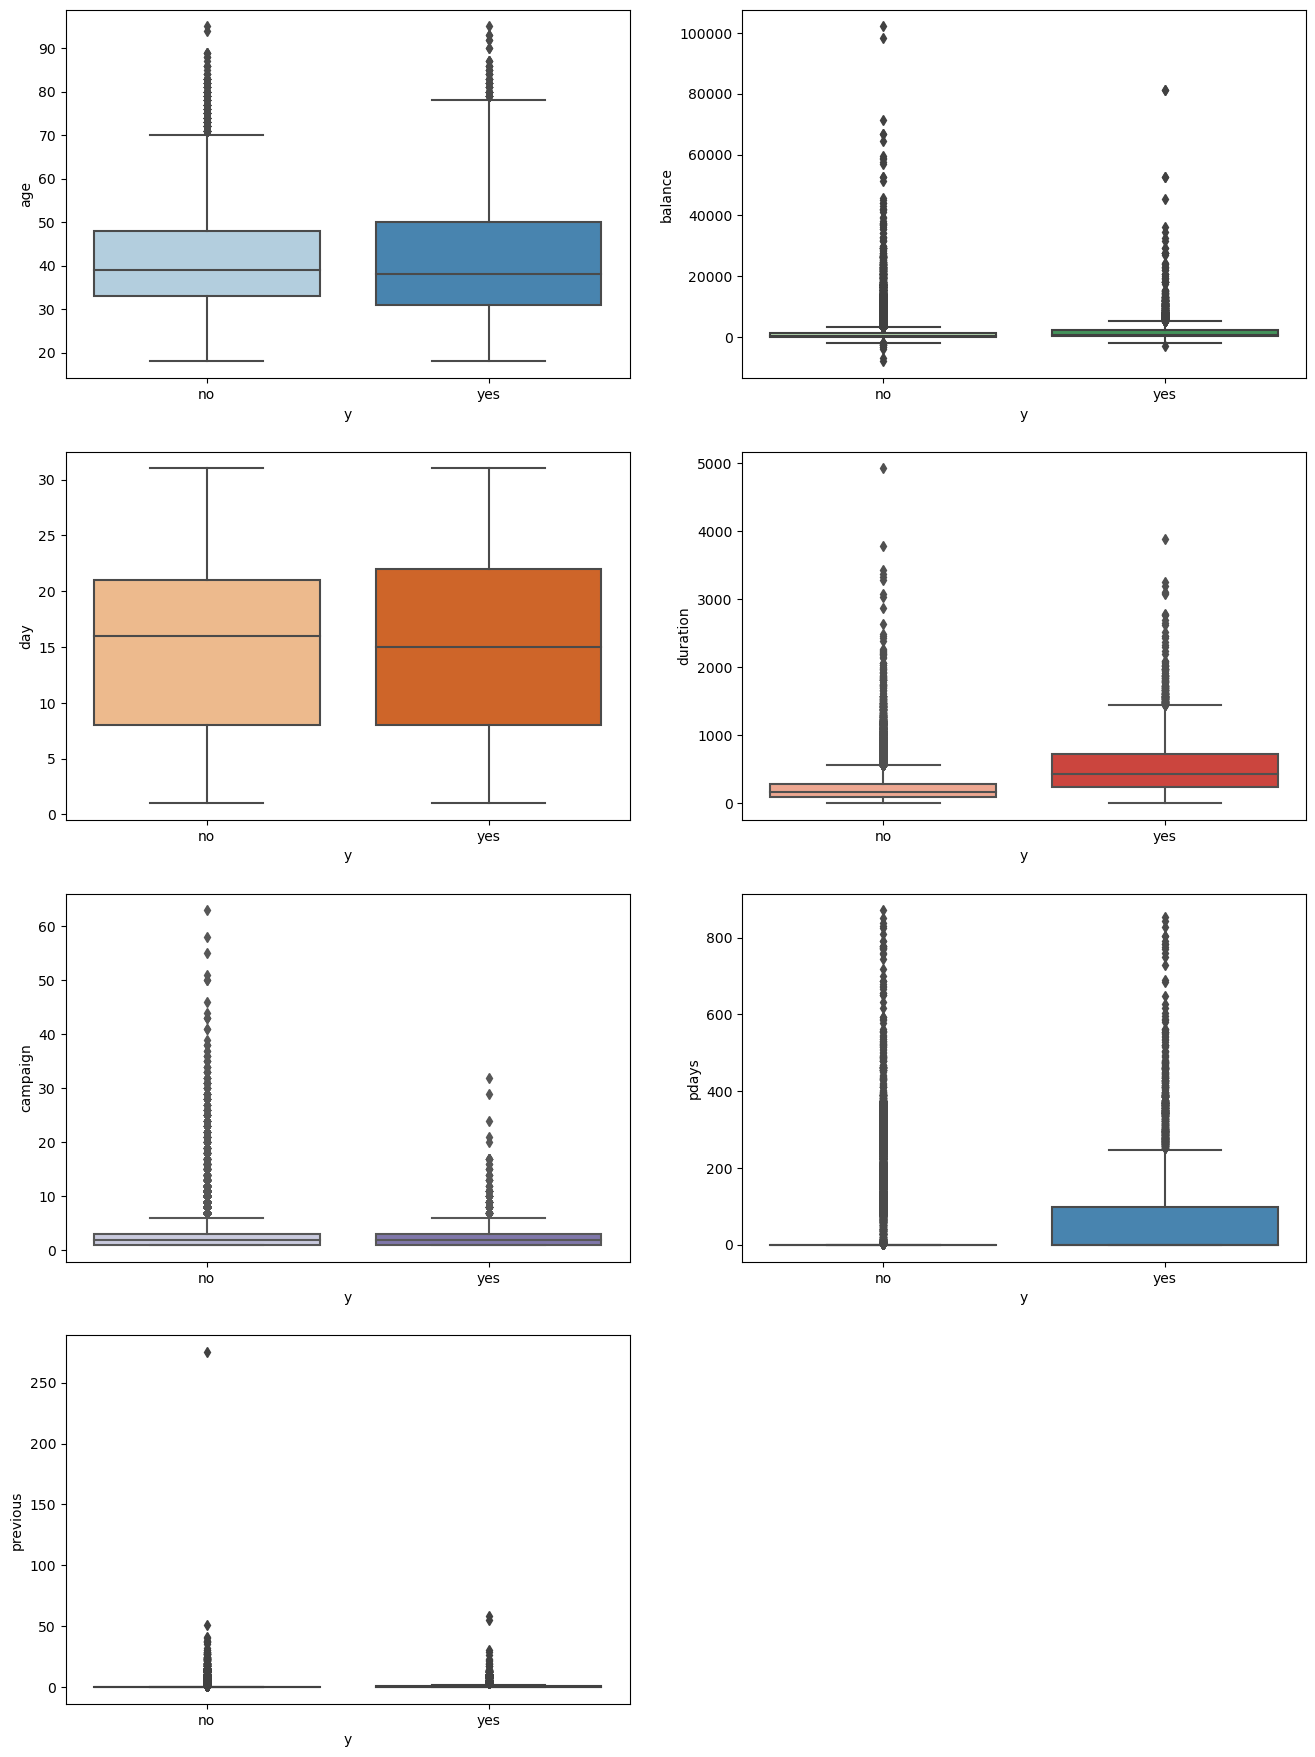

In [11]:
plt.figure(figsize=(16, 22))

# age
plt.subplot(4, 2, 1)
sns.boxplot(x="y", y="age", data=df, palette="Blues")

# balance
plt.subplot(4, 2, 2)
sns.boxplot(x="y", y="balance", data=df, palette="Greens") 

# day
plt.subplot(4, 2, 3)
sns.boxplot(x="y", y="day", data=df, palette="Oranges") 

# duration
plt.subplot(4, 2, 4)
sns.boxplot(x="y", y="duration", data=df, palette="Reds")  

# campaign
plt.subplot(4, 2, 5)
sns.boxplot(x="y", y="campaign", data=df, palette="Purples") 
# pdays
plt.subplot(4, 2, 6)
sns.boxplot(x="y", y="pdays", data=df, palette="Blues")  

# previous
plt.subplot(4, 2, 7)
sns.boxplot(x="y", y="previous", data=df, palette="Greens") 

plt.show()

Dari box plot diatas dapat dilihat, beberapa kolom memiliki outliers

In [12]:
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12704\3859094811.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\user\AppData\Local\Temp\ipykernel_12704\3859094811.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [13]:
#menghapus outlier
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\user\AppData\Local\Temp\ipykernel_12704\1842016526.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
df.shape

(28193, 17)

bentuk data setelah menghapus outliers

# Modeling

In [15]:
#membagi data menjadi input dan output
X = df.drop(["y", "job"], axis=1)
y = df["y"]
y

0         no
1         no
2         no
3         no
4         no
        ... 
45198     no
45202    yes
45203    yes
45205    yes
45209     no
Name: y, Length: 28193, dtype: object

In [16]:
X = pd.get_dummies(X)
X

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,1428,16,333,2,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
45202,34,557,17,224,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
45203,23,113,17,266,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
45205,25,505,17,386,2,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [17]:
#membagi menjadi 70% data training dan 30% data testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X train shape",X_train.shape)
print("X test shape",X_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

X train shape (19735, 36)
X test shape (8458, 36)
y train shape (19735,)
y test shape (8458,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

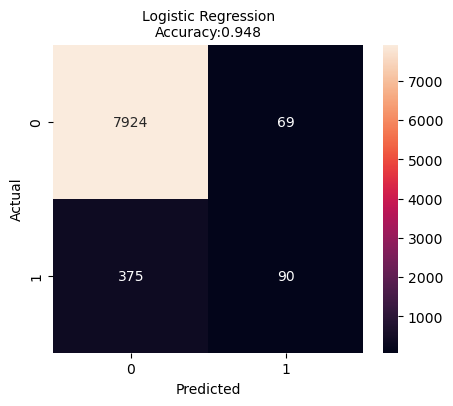

Classification Report
               precision    recall  f1-score   support

          no       0.95      0.99      0.97      7993
         yes       0.57      0.19      0.29       465

    accuracy                           0.95      8458
   macro avg       0.76      0.59      0.63      8458
weighted avg       0.93      0.95      0.94      8458



In [19]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", annot_kws={"fontsize":10})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.show()

print("Classification Report\n", classification_report(y_test, y_pred))

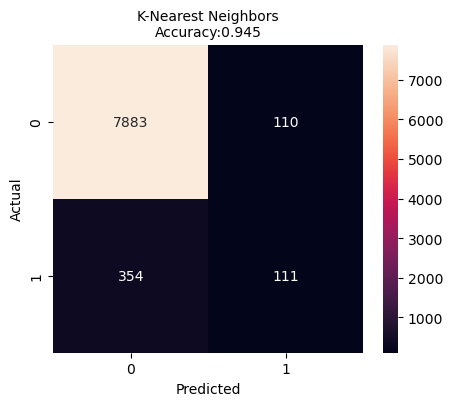

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.99      0.97      7993
         yes       0.50      0.24      0.32       465

    accuracy                           0.95      8458
   macro avg       0.73      0.61      0.65      8458
weighted avg       0.93      0.95      0.94      8458



In [20]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt=".0f", annot_kws={"fontsize": 10})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.show()

print("Classification Report\n", classification_report(y_test, y_pred_knn))

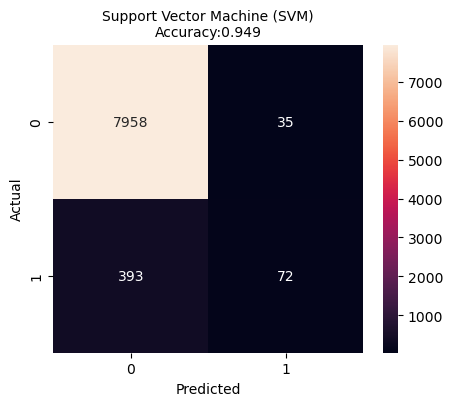

Classification Report:
               precision    recall  f1-score   support

          no       0.95      1.00      0.97      7993
         yes       0.67      0.15      0.25       465

    accuracy                           0.95      8458
   macro avg       0.81      0.58      0.61      8458
weighted avg       0.94      0.95      0.93      8458



In [21]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", annot_kws={"fontsize":10})
plt.title("Support Vector Machine (SVM)\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

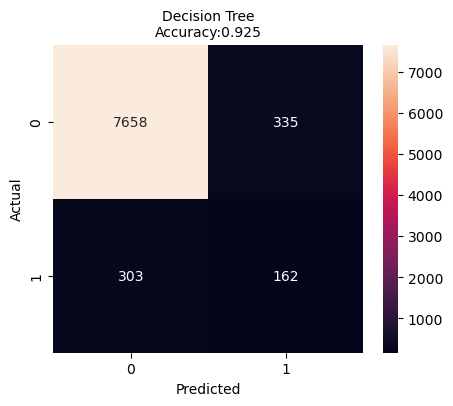

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.96      0.96      7993
         yes       0.33      0.35      0.34       465

    accuracy                           0.92      8458
   macro avg       0.64      0.65      0.65      8458
weighted avg       0.93      0.92      0.93      8458



In [22]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt=".0f", annot_kws={"fontsize": 10})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_dt)), fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.show()

print("Classification Report\n", classification_report(y_test, y_pred_dt))

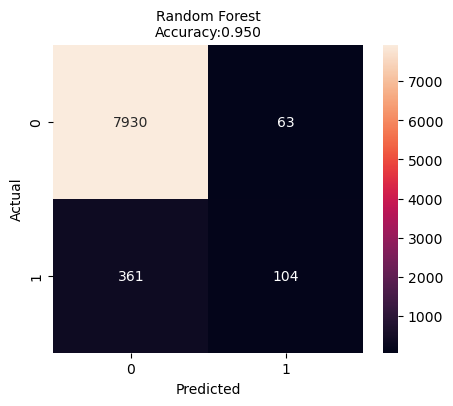

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.99      0.97      7993
         yes       0.62      0.22      0.33       465

    accuracy                           0.95      8458
   macro avg       0.79      0.61      0.65      8458
weighted avg       0.94      0.95      0.94      8458



In [23]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt=".0f", annot_kws={"fontsize": 10})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.show()

print("Classification Report\n", classification_report(y_test, y_pred_rf))

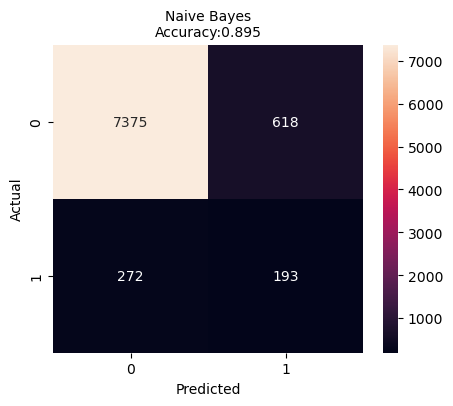

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.92      0.94      7993
         yes       0.24      0.42      0.30       465

    accuracy                           0.89      8458
   macro avg       0.60      0.67      0.62      8458
weighted avg       0.92      0.89      0.91      8458



In [24]:
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt=".0f", annot_kws={"fontsize": 10})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.show()

print("Classification Report\n", classification_report(y_test, y_pred_nb))

berdasarkan classification report dari beberapa algoritma, terdapat 3 algoritma yang memiliki akurasi yang hampir sama yaitu logistic regression, random forest, dan svm. tetapi algoritma memiliki akurasi yang lebih tinggi sedikit yaitu 0.95%, jadi bisa dikatakan random forest model yang paling cocok dengan kasus ini